# Perbandingan Kepuasan Pengguna Terhadap Metode Keamanan Smartphone Menggunakan Metode One-Way ANOVA. 

### Anggota Kelompok:
### -Fadlullah Hasan [F1D02310008]
### -Datu Reksa Hamza Putra [F1D02310045]
### -Karina Septia Suwandi [F1D02310066]
### -Nur Adinda Juniarti [F1D02310129]


# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load Data

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

# Bersihkan nama kolom
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [3]:
print("\nStatistik Deskriptif Skor Matematika per Pendidikan Orang Tua:")
print(df.groupby('parental_level_of_education')['math_score'].describe())


Statistik Deskriptif Skor Matematika per Pendidikan Orang Tua:
                             count       mean        std   min    25%   50%  \
parental_level_of_education                                                   
associate's degree           222.0  67.882883  15.112093  26.0  57.00  67.0   
bachelor's degree            118.0  69.389831  14.943789  29.0  61.00  68.0   
high school                  196.0  62.137755  14.539651   8.0  53.75  63.0   
master's degree               59.0  69.745763  15.153915  40.0  55.50  73.0   
some college                 226.0  67.128319  14.312897  19.0  59.00  67.5   
some high school             179.0  63.497207  15.927989   0.0  53.00  65.0   

                              75%    max  
parental_level_of_education               
associate's degree           80.0  100.0  
bachelor's degree            79.0  100.0  
high school                  72.0   99.0  
master's degree              81.0   95.0  
some college                 76.0  100.0  
so

# Uji Normalitas

In [4]:
print("Uji Normalitas (Shapiro-Wilk per kelompok):")
for level in df['parental_level_of_education'].unique():
    stat, p = shapiro(df[df['parental_level_of_education'] == level]['math_score'])
    print(f"{level}: p-value = {p:.4f} {'(Normal)' if p > 0.05 else '(Tidak Normal)'}")


Uji Normalitas (Shapiro-Wilk per kelompok):
bachelor's degree: p-value = 0.6044 (Normal)
some college: p-value = 0.0959 (Normal)
master's degree: p-value = 0.0317 (Tidak Normal)
associate's degree: p-value = 0.0446 (Tidak Normal)
high school: p-value = 0.0652 (Normal)
some high school: p-value = 0.0052 (Tidak Normal)


# Uji Homogenitas

In [5]:
groups = [df[df['parental_level_of_education'] == level]['math_score']
          for level in df['parental_level_of_education'].unique()]
levene_stat, levene_p = levene(*groups)
print(f"\nUji Homogenitas Varians (Levene): p-value = {levene_p:.4f} {'(Homogen)' if levene_p > 0.05 else '(Tidak Homogen)'}")



Uji Homogenitas Varians (Levene): p-value = 0.4584 (Homogen)


# Uji Anova

In [6]:
model = ols('math_score ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nHasil ANOVA:")
print(anova_table)

# Interpretasi p-value
p_val_anova = anova_table['PR(>F)'][0]
if p_val_anova < 0.05:
    print(f"\nKesimpulan: Terdapat perbedaan signifikan skor matematika berdasarkan pendidikan orang tua (p = {p_val_anova:.6f})")
else:
    print(f"\nKesimpulan: Tidak ada perbedaan signifikan skor matematika antar kelompok pendidikan orang tua (p = {p_val_anova:.6f})")



Hasil ANOVA:
                                       sum_sq     df         F    PR(>F)
C(parental_level_of_education)    7295.561831    5.0  6.521583  0.000006
Residual                        222393.517169  994.0       NaN       NaN

Kesimpulan: Terdapat perbedaan signifikan skor matematika berdasarkan pendidikan orang tua (p = 0.000006)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24108\3648820788.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val_anova = anova_table['PR(>F)'][0]


In [7]:
print("\nUji Lanjutan (Tukey HSD jika ANOVA signifikan):")
tukey_result = pairwise_tukeyhsd(endog=df['math_score'],
                                 groups=df['parental_level_of_education'],
                                 alpha=0.05)
print(tukey_result)



Uji Lanjutan (Tukey HSD jika ANOVA signifikan):
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
       high school   master

# Visualisasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24108\3538842065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='math_score', data=df, palette='Set2')


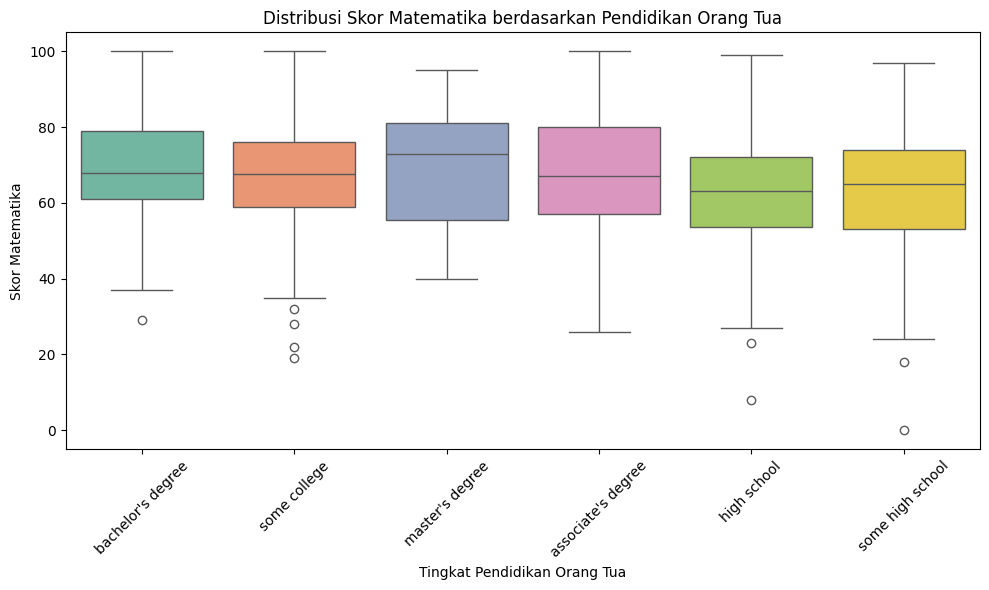

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribusi Skor Matematika berdasarkan Pendidikan Orang Tua')
plt.xlabel('Tingkat Pendidikan Orang Tua')
plt.ylabel('Skor Matematika')
plt.tight_layout()
plt.show()